In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import GridSearchCV, LeaveOneOut
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#IMPORT TRAIN AND TEST SETS
train_features = pd.read_csv('./data/derived/feature_selection/training_data_with_dual.csv', index_col=0)
test_features = pd.read_csv('./data/derived/feature_selection/test_data_with_dual.csv', index_col=0)
combined = pd.concat([train_features, test_features])


In [3]:
#FEATURE SETS
features = [
    'genome_lrtt', 'genome_maf12c', 'genome_maf3c', 'genome_ambig',
    'pol_lrtt', 'pol_maf12c', 'pol_maf3c', 'pol_ambig',
    'gag_lrtt', 'gag_maf3c', 'gag_ambig',
    'gp41_maf3c', 'gp41_ambig', 
    'gp120_lrtt', 'gp120_ambig'
]
features2 = ['genome_lrtt', 'genome_maf12c', 'genome_maf3c', 'genome_ambig', #best
             'gag_lrtt', 'gag_maf12c' ,'gag_maf3c', 'gag_ambig',
             'gp120_lrtt', 'gp120_maf12c', 'gp120_tips',
             'pol_lrtt', 'pol_maf12c', 'pol_maf3c', 'pol_ambig', 
             'gp41_maf12c' ,'gp41_maf3c', 
]
features_derived = ['genome_lrtt', 'genome_maf12c', 'genome_maf3c', 'genome_tips', 'genome_ambig',
                    'gag_lrtt', 'gag_maf12c', 'gag_maf3c', 'gag_tips', 'gag_ambig',
                    'pol_lrtt', 'pol_maf12c', 'pol_maf3c', 'pol_tips', 'pol_ambig',
                    'gp120_lrtt', 'gp120_maf12c', 'gp120_maf3c', 'gp120_tips', 'gp120_ambig',
                    'gp41_lrtt', 'gp41_maf12c', 'gp41_maf3c', 'gp41_tips', 'gp41_ambig'
]
features_tanya = ['gag_lrtt', 'gp120_lrtt', 'pol_lrtt',
                  'gp41_tips', 'gag_tips', 'gp120_tips',
                  'gp41_maf12c',
                  'gag_maf3c', 'gp41_maf3c']

In [7]:
# Convert TSI_days to TSI_years
train_features['TSI_years'] = train_features['TSI_days'] / 365
test_features['TSI_years'] = test_features['TSI_days'] / 365

# Transform TSI_years using the square root
train_features['sqrt_TSI_years'] = np.sqrt(train_features['TSI_years'])
test_features['sqrt_TSI_years'] = np.sqrt(test_features['TSI_years'])

# Transform TSI_years using the square root
train_features['log_TSI_years'] = np.log1p(train_features['TSI_years'])
test_features['log_TSI_years'] = np.log1p(test_features['TSI_years'])

In [ ]:
# Features and target variable for training and testing sets
X_train = train_features[features_derived]
y_train = train_features['log_TSI_years']
X_test = test_features[features_derived]
y_test = test_features['log_TSI_years']

# Train a random forest regressor - tuned parameters
model_sqrt = RandomForestRegressor(n_estimators=100, random_state=42,  
                                    bootstrap= True,
                                    max_depth= 10,
                                    max_features= 'sqrt',
                                    min_samples_leaf= 1,
                                    min_samples_split= 10,
                                    )

# Train a random forest regressor - tuned parameters
model_log = RandomForestRegressor(n_estimators= 300, random_state=42,  
                                    bootstrap= True,
                                    max_depth= 10,
                                    max_features= 'sqrt',
                                    min_samples_leaf= 2,
                                    min_samples_split= 5,
                                    )

# Fit model 
model_log.fit(X_train, y_train)

# Make predictions
y_pred = model_log.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# CROSS VAL FOR TUNING HYPER PARAMETERS

## LOG TRANSFORMATION

In [ ]:
# Features and target variable for training and testing sets
X_train = train_features[features_derived]
y_train = train_features['log_TSI_years']
X_test = test_features[features_derived]
y_test = test_features['log_TSI_years']

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_log = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                           param_grid=param_grid, 
                           cv=3, n_jobs=-1)
grid_search_log.fit(X_train, y_train)

best_model_log = grid_search_log.best_estimator_

# Make predictions
y_pred_log = best_model_log.predict(X_test)

In [24]:
# Evaluate the model
mse_log = mean_squared_error(y_test, y_pred_log)
r2_log = r2_score(y_test, y_pred_log)
print(f"Best Parameters: {grid_search_log.best_params_}")
print(f"Mean Squared Error: {mse_log}")
print(f"R-squared: {r2_log}")
'''
FOR LOG TRANSFORMATION: 

Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Mean Squared Error: 0.17630929090433414
R-squared: 0.6304630631128798'''

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Mean Squared Error: 0.17630929090433414
R-squared: 0.6304630631128798


"\nFOR LOG TRANSFORMATION: \n\nBest Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}\nMean Squared Error: 0.17630929090433414\nR-squared: 0.6304630631128798"

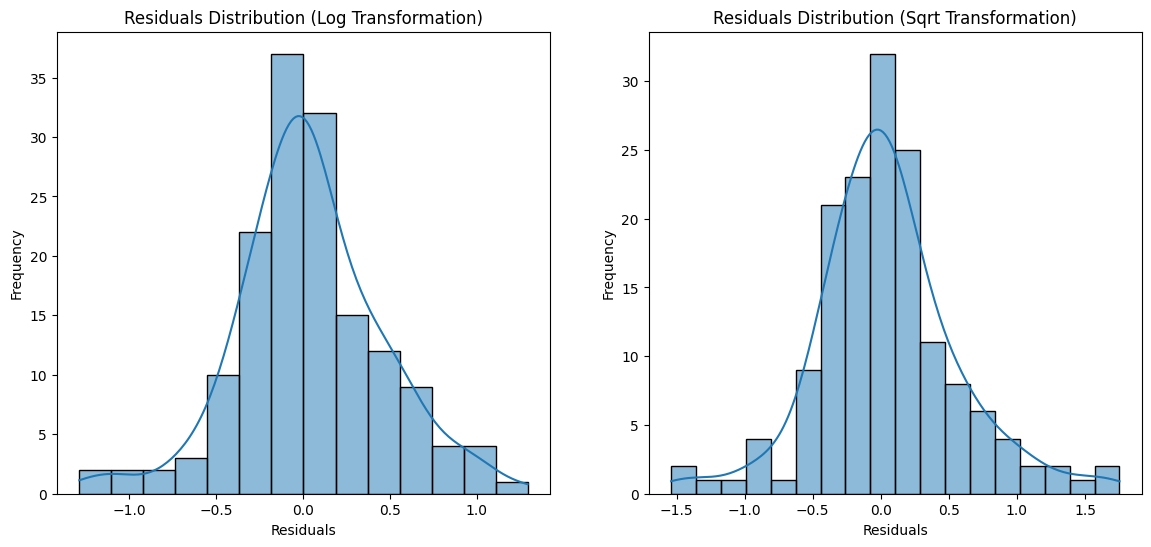

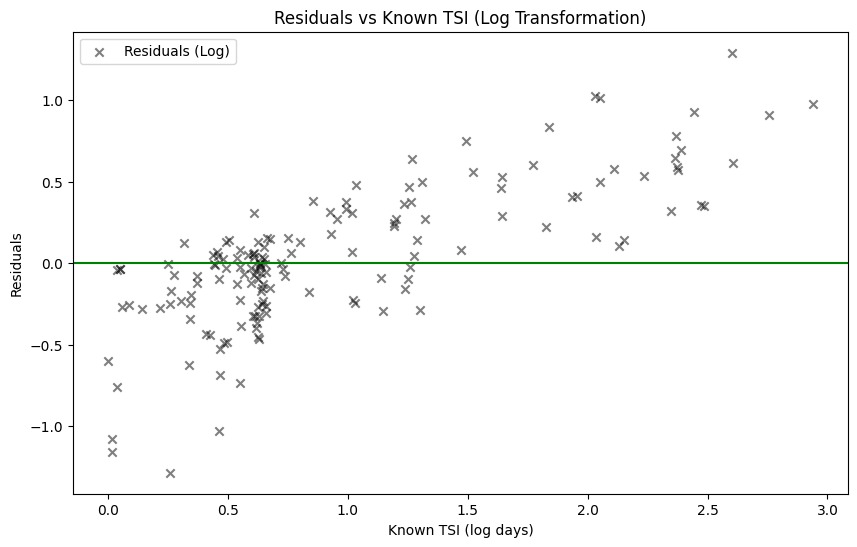

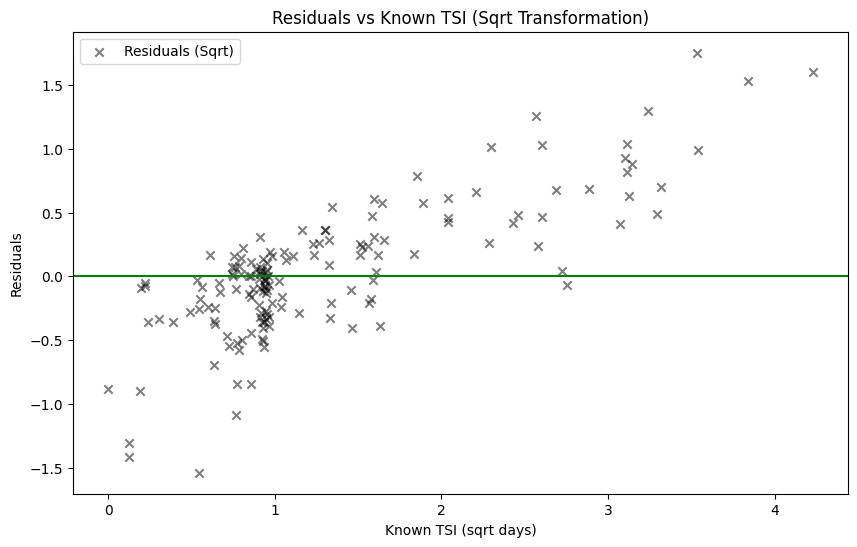

In [32]:
y_test = test_features['log_TSI_years']
# Plot residuals for log transformation
residuals_log = y_test - y_pred_log
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuals_log, kde=True)
plt.title('Residuals Distribution (Log Transformation)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')


y_test_sqrt = test_features['sqrt_TSI_years']
# Plot residuals for sqrt transformation
residuals_sqrt = y_test_sqrt - y_pred_sqrt
plt.subplot(1, 2, 2)
sns.histplot(residuals_sqrt, kde=True)
plt.title('Residuals Distribution (Sqrt Transformation)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


# Plot residuals scatter for log transformation
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals_log, alpha=0.5, label='Residuals (Log)', color='black', marker='x')
plt.axhline(y=0, color='g', linestyle='-')
plt.xlabel('Known TSI (log days)')
plt.ylabel('Residuals')
plt.title('Residuals vs Known TSI (Log Transformation)')
plt.legend()
plt.show()

# Plot residuals scatter for sqrt transformation
plt.figure(figsize=(10, 6))
plt.scatter(y_test_sqrt, residuals_sqrt, alpha=0.5, label='Residuals (Sqrt)', color='black', marker='x')
plt.axhline(y=0, color='g', linestyle='-')
plt.xlabel('Known TSI (sqrt days)')
plt.ylabel('Residuals')
plt.title('Residuals vs Known TSI (Sqrt Transformation)')
plt.legend()
plt.show()

## SQRT TRANSFOMRATION

In [ ]:
# Features and target variable for training and testing sets
X_train = train_features[features_derived]
y_train = train_features['sqrt_TSI_years']
X_test = test_features[features_derived]
y_test = test_features['sqrt_TSI_years']

grid_search_sqrt = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                                param_grid=param_grid, 
                                cv=3, n_jobs=-1)
grid_search_sqrt.fit(X_train, y_train)

best_model_sqrt = grid_search_sqrt.best_estimator_

# Make predictions
y_pred_sqrt = best_model_sqrt.predict(X_test)

# Evaluate the model
mse_sqrt = mean_squared_error(y_test, y_pred_sqrt)
r2_sqrt = r2_score(y_test, y_pred_sqrt)
print(f"Best Parameters: {grid_search_sqrt.best_params_}")
print(f"Mean Squared Error: {mse_sqrt}")
print(f"R-squared: {r2_sqrt}")

'''
FOR SQRT (YEARS) TRANSFORMATION: 
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Mean Squared Error: 0.26979099769010256
R-squared: 0.6275760877611523
'''


### COMPARISON OF TRANSFORMATIONS IN PREDICTIONS

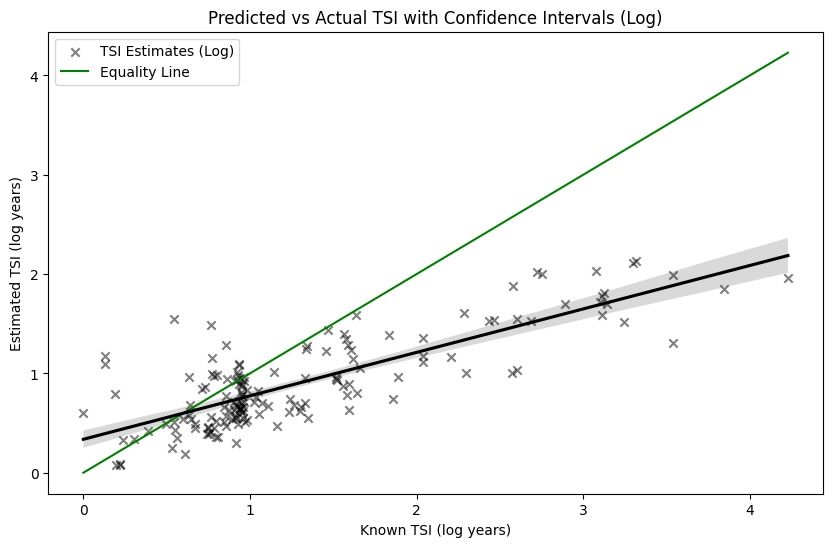

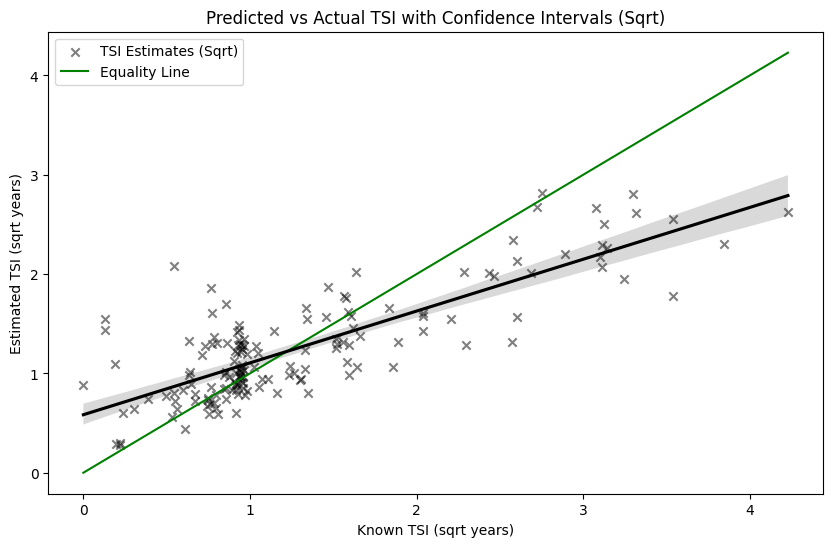

In [36]:
# Plot predicted vs actual values for log transformation
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_log, alpha=0.5, label='TSI Estimates (Log)', color='black', marker='x')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g-', label='Equality Line')
sns.regplot(x=y_test, y=y_pred_log, scatter=False, ci=95, color='black')
plt.xlabel('Known TSI (log years)')
plt.ylabel('Estimated TSI (log years)')
plt.title('Predicted vs Actual TSI with Confidence Intervals (Log)')
plt.legend()
plt.savefig('./outputs/predictions/predicted_log_tsi_years.png')
plt.show()

# Plot predicted vs actual values for sqrt transformation
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_sqrt, alpha=0.5, label='TSI Estimates (Sqrt)', color='black', marker='x')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g-', label='Equality Line')
sns.regplot(x=y_test, y=y_pred_sqrt, scatter=False, ci=95, color='black')
plt.xlabel('Known TSI (sqrt years)')
plt.ylabel('Estimated TSI (sqrt years)')
plt.title('Predicted vs Actual TSI with Confidence Intervals (Sqrt)')
plt.legend()
plt.savefig('./outputs/predictions/predicted_sqrt_tsi_years.png')
plt.show()


# PLOT RESULTS W/TUNED HYPERPARAMETERS

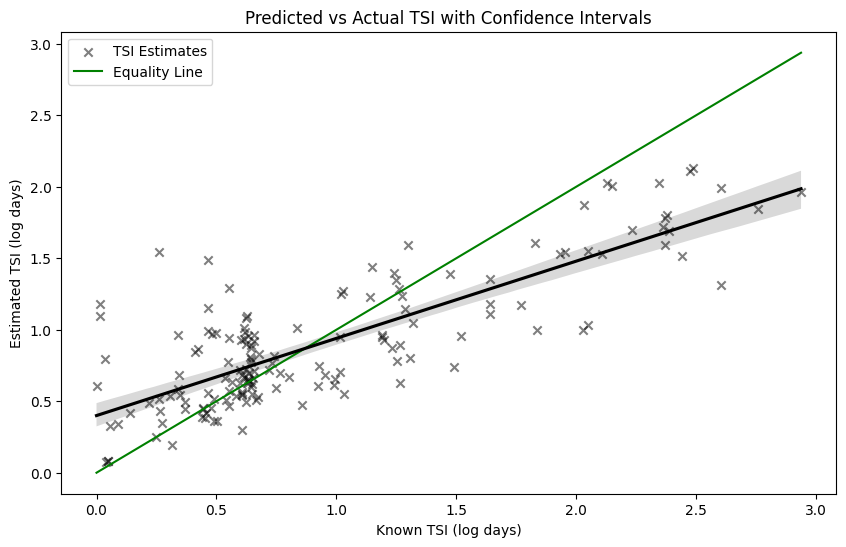

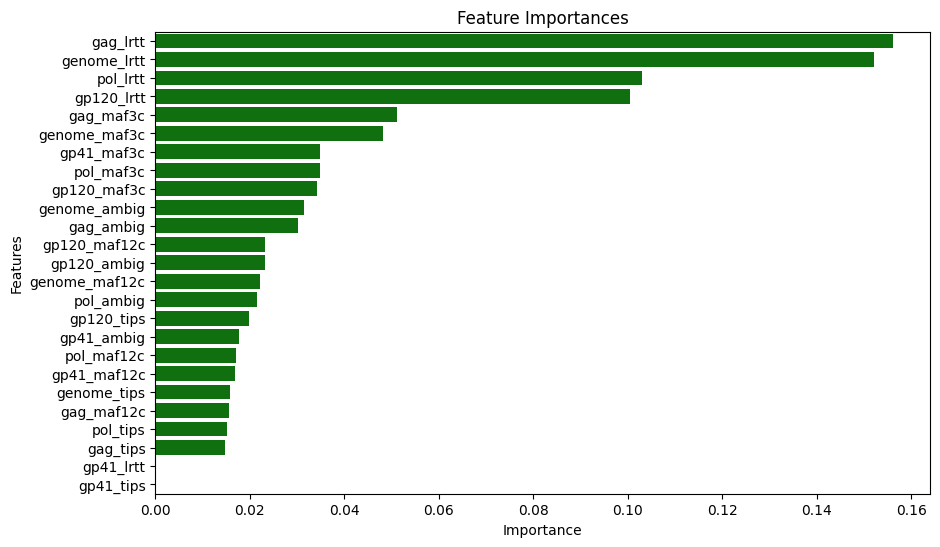

In [26]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='TSI Estimates', color='black', marker='x')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g-', label='Equality Line')
sns.regplot(x=y_test, y=y_pred, scatter=False, ci=95, color='black')
plt.xlabel('Known TSI (log years)')
plt.ylabel('Estimated TSI (log years)')
plt.title('Predicted vs Actual TSI with Confidence Intervals')
plt.legend()
#plt.savefig('./outputs/predictions/predicted_log_tsi_days.png')
plt.show()

# Plot feature importances
feature_importances = best_model_log.feature_importances_
features = features_derived

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({
    'Feature': features_derived,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, color = 'green')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# LOOCV

In [9]:
# Convert TSI_days to TSI_years
combined['TSI_years'] = combined['TSI_days'] / 365

# Transform TSI_years using the square root
combined['log_TSI_years'] = np.log1p(combined['TSI_years'])

In [16]:
# Features and target variable for the combined dataset
X = combined[features_derived]
y = combined['log_TSI_years']

In [ ]:
# Initialize LeaveOneOut cross-validator
loo = LeaveOneOut()

# Arrays to store results
predictions = []
true_values = []
prediction_errors = []

# Perform LOO-CV
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train Random Forest model
    model_log = RandomForestRegressor(n_estimators= 300, random_state=42,  
                                        bootstrap= True,
                                        max_depth= 10,
                                        max_features= 'sqrt',
                                        min_samples_leaf= 2,
                                        min_samples_split= 5,
                                        )
    model_log.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model_log.predict(X_test)
    
    # Store results
    predictions.append(y_pred[0])
    true_values.append(y_test.values[0])
    prediction_errors.append(np.abs(y_pred[0] - y_test.values[0]))


In [45]:
# Convert results to numpy arrays
predictions = np.array(predictions)
true_values = np.array(true_values)
prediction_errors = np.array(prediction_errors)

# Train a model on the mean absolute errors to generate prediction intervals
error_model = RandomForestRegressor(n_estimators= 300, random_state=42,   #log model 
                                    bootstrap= True,
                                    max_depth= 10,
                                    max_features= 'sqrt',
                                    min_samples_leaf= 2,
                                    min_samples_split= 5,
                                    )
error_model.fit(X, prediction_errors)

# Generate prediction intervals for the combined set
prediction_intervals = error_model.predict(X)

# Evaluate the model on the combined set
mse = mean_squared_error(true_values, predictions)
mae = mean_absolute_error
r2 = r2_score(true_values, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Aboslute Error: {mae}]")
print(f"R-squared: {r2}")

'''SQRT TRANSFORMATION: 
Mean Squared Error: 0.26945519141545954
R-squared: 0.6079236305146587
'''

Mean Squared Error: 0.18379442731891057
R-squared: 0.6157616414500668


'SQRT TRANSFORMATION: \nMean Squared Error: 0.26945519141545954\nR-squared: 0.6079236305146587\n'

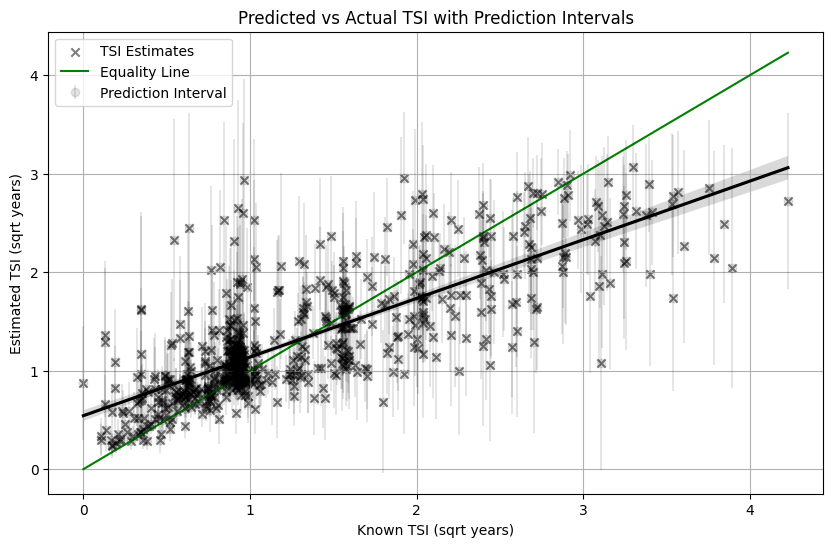

In [45]:
# Plot predicted vs actual values with prediction intervals
plt.figure(figsize=(10, 6))
plt.scatter(true_values, predictions, alpha=0.5, label='TSI Estimates', color='black', marker='x') #predictions vs true values 
plt.plot([true_values.min(), true_values.max()], [true_values.min(), true_values.max()], 'g-', label='Equality Line') #equality line
sns.regplot(x=true_values, y=predictions, scatter=False, ci=95, color='black') #regression line
plt.errorbar(true_values, predictions, yerr=prediction_intervals, fmt='o', alpha=0.1, color='black', label='Prediction Interval')
plt.xlabel('Known TSI (sqrt years)')
plt.ylabel('Estimated TSI (sqrt years)')
plt.title('Predicted vs Actual TSI with Prediction Intervals')
plt.legend()
plt.grid(True) 
plt.savefig('./outputs/predictions/predicted_tsi_years_loocv.png')
plt.show()

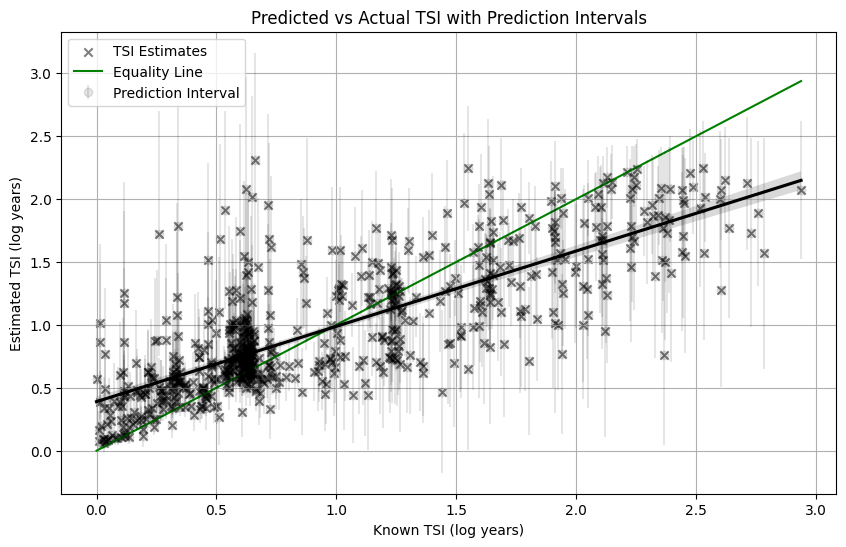

In [46]:
# Plot predicted vs actual values with prediction intervals
plt.figure(figsize=(10, 6))
plt.scatter(true_values, predictions, alpha=0.5, label='TSI Estimates', color='black', marker='x') #predictions vs true values 
plt.plot([true_values.min(), true_values.max()], [true_values.min(), true_values.max()], 'g-', label='Equality Line') #equality line
sns.regplot(x=true_values, y=predictions, scatter=False, ci=95, color='black') #regression line
plt.errorbar(true_values, predictions, yerr=prediction_intervals, fmt='o', alpha=0.1, color='black', label='Prediction Interval')
plt.xlabel('Known TSI (log years)')
plt.ylabel('Estimated TSI (log years)')
plt.title('Predicted vs Actual TSI with Prediction Intervals')
plt.legend()
plt.grid(True) 
plt.savefig('./outputs/predictions/predicted_log_tsi_years_loocv.png')
plt.show()

# TANYAS FEATURE SET - SQRT

## a - hyper parameter tuning

In [5]:
# Features and target variable for training and testing sets
X_train = train_features[features_tanya]
y_train = train_features['sqrt_TSI_years']
X_test = test_features[features_tanya]
y_test = test_features['sqrt_TSI_years']

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_tanya = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                                param_grid=param_grid, 
                                cv=3, n_jobs=-1)
grid_search_tanya.fit(X_train, y_train)

best_model_tanya = grid_search_tanya.best_estimator_

# Make predictions
y_pred_tanya = best_model_tanya.predict(X_test)

In [8]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_tanya)
mae = mean_absolute_error(y_test, y_pred_tanya)
rmse = root_mean_squared_error(y_test, y_pred_tanya)

r2 = r2_score(y_test, y_pred_tanya)
print(f"Best Parameters: {grid_search_tanya.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error: 0.2891231548349141
Mean Absolute Error: 0.39499289673048765
Root Mean Squared Error: 0.5377017340821155
R-squared: 0.6008896613884053


## b - loocv

In [48]:
# Convert TSI_days to TSI_years
combined['TSI_years'] = combined['TSI_days'] / 365

# Transform TSI_years using the square root
combined['sqrt_TSI_years'] = np.sqrt(combined['TSI_years'])

# Features and target variable for the combined dataset
X = combined[features_tanya]
y = combined['sqrt_TSI_years']

In [11]:
# Initialize LeaveOneOut cross-validator
loo = LeaveOneOut()

# Arrays to store results
predictions_tanya = []
true_values = []
prediction_errors_tanya = []

# Perform LOO-CV
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train Random Forest model
    model_tanya = RandomForestRegressor(n_estimators= 100, random_state=42,  
                                        bootstrap= True,
                                        max_depth= 10,
                                        max_features= 'sqrt',
                                        min_samples_leaf= 2,
                                        min_samples_split= 2,
                                        )
    model_tanya.fit(X_train, y_train)
    
    # Make predictions
    y_pred_tanya = model_tanya.predict(X_test)
    
    # Store results
    predictions_tanya.append(y_pred_tanya[0])
    true_values.append(y_test.values[0])
    prediction_errors_tanya.append(np.abs(y_pred_tanya[0] - y_test.values[0]))


In [37]:
# Convert results to numpy arrays
predictions_tanya = np.array(predictions_tanya)
true_values = np.array(true_values)
prediction_errors_tanya = np.array(prediction_errors_tanya)

# Train a model on the mean absolute errors to generate prediction intervals
error_model = RandomForestRegressor(n_estimators= 100, random_state=42,  
                                        bootstrap= True,
                                        max_depth= 10,
                                        max_features= 'sqrt',
                                        min_samples_leaf= 2,
                                        min_samples_split= 2,
                                        )
error_model.fit(X, prediction_errors_tanya)

# Generate prediction intervals for the combined set
prediction_intervals = error_model.predict(X)

# Evaluate the model on the combined set
mse = mean_squared_error(true_values, predictions_tanya)
mae = mean_absolute_error(true_values, predictions_tanya)
rmse = root_mean_squared_error(true_values, predictions_tanya)
r2 = r2_score(true_values, predictions_tanya)

print(f"Mean Squared Error: {mse}")
print(f"Mean Aboslute Error: {mae}]")
print(f"Root Mean Square Error: {rmse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.26778255025430037
Mean Aboslute Error: 0.3753345920814068]
Root Mean Square Error: 0.5174771011883524
R-squared: 0.6103574417560531


# MY FEATURE SET 1 - LOG

## a - hyper parameter tuning

In [19]:
features1 = ['genome_lrtt', 'genome_maf12c', 'genome_maf3c', 'genome_ambig',
            'gag_lrtt', 'gag_maf12c', 'gag_maf3c', 'gag_tips', 'gag_ambig',
            'pol_lrtt', 'pol_maf12c', 'pol_maf3c', 'pol_tips', 'pol_ambig',
            'gp120_lrtt', 'gp120_maf12c', 'gp120_maf3c', 'gp120_tips', 
            'gp41_maf12c', 'gp41_maf3c',
            'lrtt_coeff_1']

# Features and target variable for training and testing sets
X_train = train_features[features1]
y_train = train_features['log_TSI_years']
X_test = test_features[features1]
y_test = test_features['log_TSI_years']

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search1 = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                                param_grid=param_grid, 
                                cv=3, n_jobs=-1)
grid_search1.fit(X_train, y_train)

best_model1 = grid_search1.best_estimator_

# Make predictions
y_pred1 = best_model1.predict(X_test)

In [20]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred1)
mae = mean_absolute_error(y_test, y_pred1)
rmse = root_mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
print(f"Best Parameters: {grid_search1.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Mean Squared Error: 0.1785495869945473
Mean Absolute Error: 0.3099784553521799
Root Mean Squared Error: 0.4225512832716844
R-squared: 0.625767495734376


## b - loocv

# MY FEATURE SET 5 - LOG

In [21]:
features5 = ['genome_lrtt', 'gag_lrtt', 'pol_lrtt', 'gp120_lrtt',
            'gp120_maf12c', 'genome_maf3c', 'gp41_maf3c', 'gag_maf3c', 
            'genome_maf12c', 'gp120_ambig', 
            'lrtt_coeff_1', 'lrtt_coeff_3']


# Features and target variable for training and testing sets
X_train = train_features[features5]
y_train = train_features['log_TSI_years']
X_test = test_features[features5]
y_test = test_features['log_TSI_years']

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search5 = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                                param_grid=param_grid, 
                                cv=3, n_jobs=-1)
grid_search5.fit(X_train, y_train)

best_model5 = grid_search5.best_estimator_

# Make predictions
y_pred5 = best_model5.predict(X_test)

In [22]:
# Evaluate the model
mse_f5 = mean_squared_error(y_test, y_pred5)
mae_f5 = mean_absolute_error(y_test, y_pred5)
rmse_f5 = root_mean_squared_error(y_test, y_pred5)
r2_f5 = r2_score(y_test, y_pred5)
print(f"Best Parameters: {grid_search5.best_params_}")
print(f"Mean Squared Error: {mse_f5}")
print(f"Mean Absolute Error: {mae_f5}")
print(f"Root Mean Squared Error: {rmse_f5}")
print(f"R-squared: {r2_f5}")

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Mean Squared Error: 0.19138255670434057
Mean Absolute Error: 0.3209311958893857
Root Mean Squared Error: 0.4374729211097992
R-squared: 0.598870125247557


# MY FEATURE SET 7.0 - LOG

In [23]:
features7 = ['genome_lrtt', 'gag_lrtt', 'pol_lrtt', 'gp120_lrtt',
            'gp120_maf12c', 'genome_maf3c', 'gp41_maf3c', 'gag_maf3c', 
            'genome_maf12c', 'gp120_ambig', 
            'lrtt_coeff_1', 'lrtt_coeff_3', 'gp120_maf3c']


# Features and target variable for training and testing sets
X_train = train_features[features7]
y_train = train_features['log_TSI_years']
X_test = test_features[features7]
y_test = test_features['log_TSI_years']

grid_search7 = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                                param_grid=param_grid, 
                                cv=3, n_jobs=-1)
grid_search7.fit(X_train, y_train)

best_model7 = grid_search7.best_estimator_

# Make predictions
y_pred7 = best_model7.predict(X_test)

In [24]:
# Evaluate the model
mse_f7 = mean_squared_error(y_test, y_pred7)
mae_f7 = mean_absolute_error(y_test, y_pred7)
rmse_f7 = root_mean_squared_error(y_test, y_pred7)
r2_f7 = r2_score(y_test, y_pred7)
print(f"Best Parameters: {grid_search7.best_params_}")
print(f"Mean Squared Error: {mse_f7}")
print(f"Mean Absolute Error: {mae_f7}")
print(f"Root Mean Squared Error: {rmse_f7}")
print(f"R-squared: {r2_f7}")

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Mean Squared Error: 0.1866104867829122
Mean Absolute Error: 0.31986127695995775
Root Mean Squared Error: 0.4319843594193107
R-squared: 0.6088721852202935


# MY FEATURE SET 2 - LOG

In [27]:
features2 = ['genome_lrtt', 'genome_maf12c', 'genome_maf3c', 'genome_ambig',
                    'gag_lrtt', 'gag_maf12c', 'gag_maf3c', 'gag_tips', 'gag_ambig',
                    'pol_lrtt', 'pol_maf12c', 'pol_maf3c', 'pol_tips', 'pol_ambig',
                    'gp120_lrtt', 'gp120_maf12c', 'gp120_maf3c', 'gp120_tips', 
                    'gp41_maf12c', 'gp41_maf3c',
                    'lrtt_coeff_1', 'lrtt_coeff_3']

# Features and target variable for training and testing sets
X_train = train_features[features2]
y_train = train_features['log_TSI_years']
X_test = test_features[features2]
y_test = test_features['log_TSI_years']

grid_search2 = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                                param_grid=param_grid, 
                                cv=3, n_jobs=-1)
grid_search2.fit(X_train, y_train)

best_model2 = grid_search2.best_estimator_

# Make predictions
y_pred2 = best_model2.predict(X_test)

In [28]:
# Evaluate the model
mse_f2 = mean_squared_error(y_test, y_pred2)
mae_f2 = mean_absolute_error(y_test, y_pred2)
rmse_f2 = root_mean_squared_error(y_test, y_pred2)
r2_f2 = r2_score(y_test, y_pred2)
print(f"Best Parameters: {grid_search2.best_params_}")
print(f"Mean Squared Error: {mse_f2}")
print(f"Mean Absolute Error: {mae_f2}")
print(f"Root Mean Squared Error: {rmse_f2}")
print(f"R-squared: {r2_f2}")

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error: 0.186413939898751
Mean Absolute Error: 0.31428366744859876
Root Mean Squared Error: 0.43175680643013725
R-squared: 0.6092841393104897


# RECV2 - LOG

In [31]:
features_derived2 = ['genome_lrtt', 'genome_maf12c', 'genome_maf3c', 'genome_dual', 
                     'gag_lrtt', 'gag_maf12c', 'gag_maf3c', 
                     'pol_maf12c', 'pol_maf3c', 'pol_tips', 'pol_reads', 
                     'gp120_lrtt', 'gp120_maf3c', 'gp120_tips',  
                     'gp41_maf3c', 
                     'lrtt_coeff_0', 'lrtt_coeff_1', 'lrtt_coeff_2', 'lrtt_coeff_3', 'lrtt_coeff_4', 'lrtt_coeff_5', 'lrtt_coeff_6', 'lrtt_coeff_8', 'lrtt_coeff_10', 'lrtt_coeff_11', 
                     'maf12c_coeff_1', 'maf12c_coeff_3', 'maf12c_coeff_4', 'maf12c_coeff_5', 'maf12c_coeff_6', 'maf12c_coeff_7', 'maf12c_coeff_9', 'maf12c_coeff_10', 'maf12c_coeff_11', 
                     'maf3c_coeff_0', 'maf3c_coeff_1', 'maf3c_coeff_2', 'maf3c_coeff_3', 'maf3c_coeff_4', 'maf3c_coeff_5', 
                     'genome_ambig', 'gag_ambig', 'pol_ambig', 'gp120_ambig']

# Features and target variable for training and testing sets
X_train = train_features[features_derived2]
y_train = train_features['log_TSI_years']
X_test = test_features[features_derived2]
y_test = test_features['log_TSI_years']

grid_search_d2 = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                                param_grid=param_grid, 
                                cv=3, n_jobs=-1)
grid_search_d2.fit(X_train, y_train)

best_model_d2 = grid_search_d2.best_estimator_

# Make predictions
y_pred_d2 = best_model_d2.predict(X_test)

In [32]:
# Evaluate the model
mse_d2 = mean_squared_error(y_test, y_pred_d2)
mae_d2 = mean_absolute_error(y_test, y_pred_d2)
rmse_d2 = root_mean_squared_error(y_test, y_pred_d2)
r2_d2 = r2_score(y_test, y_pred_d2)
print(f"Best Parameters: {grid_search_d2.best_params_}")
print(f"Mean Squared Error: {mse_d2}")
print(f"Mean Absolute Error: {mae_d2}")
print(f"Root Mean Squared Error: {rmse_d2}")
print(f"R-squared: {r2_d2}")

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Mean Squared Error: 0.1813889855577695
Mean Absolute Error: 0.3163813752453919
Root Mean Squared Error: 0.42589785812770825
R-squared: 0.6198162345032014


# TOP 10 FEATURE IMPORTANT

In [29]:
features_top10 = ['genome_lrtt', 'genome_ambig',
                    'gag_lrtt', 'gag_maf3c', 'gag_ambig',
                    'pol_maf3c', 'pol_ambig',
                    'gp120_lrtt',
                    'lrtt_coeff_1', 'lrtt_coeff_4']

# Features and target variable for training and testing sets
X_train = train_features[features_top10]
y_train = train_features['log_TSI_years']
X_test = test_features[features_top10]
y_test = test_features['log_TSI_years']

grid_search_top10 = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                                param_grid=param_grid, 
                                cv=3, n_jobs=-1)
grid_search_top10.fit(X_train, y_train)

best_model_top10 = grid_search_top10.best_estimator_

# Make predictions
y_pred_top10 = best_model_top10.predict(X_test)

In [30]:
# Evaluate the model
mse_top10 = mean_squared_error(y_test, y_pred_top10)
mae_top10 = mean_absolute_error(y_test, y_pred_top10)
rmse_top10 = root_mean_squared_error(y_test, y_pred_top10)
r2_top10 = r2_score(y_test, y_pred_top10)
print(f"Best Parameters: {grid_search_top10.best_params_}")
print(f"Mean Squared Error: {mse_top10}")
print(f"Mean Absolute Error: {mae_top10}")
print(f"Root Mean Squared Error: {rmse_top10}")
print(f"R-squared: {r2_top10}")

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Mean Squared Error: 0.1813911003409289
Mean Absolute Error: 0.3124293045897274
Root Mean Squared Error: 0.42590034085561485
R-squared: 0.6198118020057028


# MY FEATURE SET 10 -LOG

## a - hyperparameter tuned

In [33]:
features10= ['genome_lrtt', 'genome_maf12c', 'genome_maf3c', 'genome_tips', 'genome_ambig',
            'gag_lrtt', 'gag_maf12c', 'gag_maf3c', 'gag_tips', 'gag_ambig',
            'pol_lrtt', 'pol_maf12c', 'pol_maf3c', 'pol_tips', 'pol_ambig',
            'gp120_lrtt', 'gp120_maf12c', 'gp120_maf3c', 'gp120_tips', 'gp120_ambig',
            'gp41_lrtt', 'gp41_maf12c', 'gp41_maf3c', 'gp41_tips', 'gp41_ambig',
            'lrtt_coeff_1']

# Features and target variable for training and testing sets
X_train = train_features[features10]
y_train = train_features['log_TSI_years']
X_test = test_features[features10]
y_test = test_features['log_TSI_years']

grid_search_f10 = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                                param_grid=param_grid, 
                                cv=3, n_jobs=-1)
grid_search_f10.fit(X_train, y_train)

best_model_f10 = grid_search_f10.best_estimator_

# Make predictions
y_pred_f10 = best_model_f10.predict(X_test)

In [34]:
# Evaluate the model
mse_f10 = mean_squared_error(y_test, y_pred_f10)
mae_f10 = mean_absolute_error(y_test, y_pred_f10)
rmse_f10 = root_mean_squared_error(y_test, y_pred_f10)
r2_f10 = r2_score(y_test, y_pred_f10)
print(f"Best Parameters: {grid_search_f10.best_params_}")
print(f"Mean Squared Error: {mse_f10}")
print(f"Mean Absolute Error: {mae_f10}")
print(f"Root Mean Squared Error: {rmse_f10}")
print(f"R-squared: {r2_f10}")

Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 0.1797215361573357
Mean Absolute Error: 0.31343390575387975
Root Mean Squared Error: 0.42393576890530915
R-squared: 0.6233111390580892


## b - loocv

In [40]:
# Features and target variable for the combined dataset
X = combined[features10]
y = combined['log_TSI_years']

# Initialize LeaveOneOut cross-validator
loo = LeaveOneOut()

# Arrays to store results
predictions = []
true_values = []
prediction_errors = []

# Perform LOO-CV
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train Random Forest model
    model = RandomForestRegressor(n_estimators= 200, random_state=42,  
                                        bootstrap= True,
                                        max_depth= 10,
                                        max_features= 'log2',
                                        min_samples_leaf= 2,
                                        min_samples_split= 2,
                                        )
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Store results
    predictions.append(y_pred[0])
    true_values.append(y_test.values[0])
    prediction_errors.append(np.abs(y_pred[0] - y_test.values[0]))

# Convert results to numpy arrays
predictions = np.array(predictions)
true_values = np.array(true_values)
prediction_errors = np.array(prediction_errors)

# Train a model on the mean absolute errors to generate prediction intervals
error_model = RandomForestRegressor(n_estimators= 200, random_state=42,  
                                        bootstrap= True,
                                        max_depth= 10,
                                        max_features= 'log2',
                                        min_samples_leaf= 2,
                                        min_samples_split= 2,
                                        )
error_model.fit(X, prediction_errors)

# Generate prediction intervals for the combined set
prediction_intervals = error_model.predict(X)

# Evaluate the model on the combined set
mse = mean_squared_error(true_values, predictions)
mae = mean_absolute_error(true_values, predictions)
rmse = root_mean_squared_error(true_values, predictions)
r2 = r2_score(true_values, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Aboslute Error: {mae}]")
print(f"Root Mean Square Error: {rmse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.1812418223791453
Mean Aboslute Error: 0.31643310103177186]
Root Mean Square Error: 0.4257250549112012
R-squared: 0.6210980857938336


# MY FEATURE SET 11 - LOG

## a - hyperparameter tuned model

In [35]:
features11= ['genome_lrtt', 'genome_maf12c', 'genome_maf3c', 'genome_tips', 'genome_ambig',
            'gag_lrtt', 'gag_maf12c', 'gag_maf3c', 'gag_tips', 'gag_ambig',
            'pol_lrtt', 'pol_maf12c', 'pol_maf3c', 'pol_tips', 'pol_ambig',
            'gp120_lrtt', 'gp120_maf12c', 'gp120_maf3c', 'gp120_tips', 'gp120_ambig',
            'gp41_lrtt', 'gp41_maf12c', 'gp41_maf3c', 'gp41_tips', 'gp41_ambig',
            'lrtt_coeff_1', 'lrtt_coeff_3']

# Features and target variable for training and testing sets
X_train = train_features[features11]
y_train = train_features['log_TSI_years']
X_test = test_features[features11]
y_test = test_features['log_TSI_years']

grid_search_f11 = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                                param_grid=param_grid, 
                                cv=3, n_jobs=-1)
grid_search_f11.fit(X_train, y_train)

best_model_f11 = grid_search_f11.best_estimator_

# Make predictions
y_pred_f11 = best_model_f11.predict(X_test)

In [36]:
# Evaluate the model
mse_f11 = mean_squared_error(y_test, y_pred_f11)
mae_f11 = mean_absolute_error(y_test, y_pred_f11)
rmse_f11 = root_mean_squared_error(y_test, y_pred_f10)
r2_f11 = r2_score(y_test, y_pred_f11)
print(f"Best Parameters: {grid_search_f11.best_params_}")
print(f"Mean Squared Error: {mse_f11}")
print(f"Mean Absolute Error: {mae_f11}")
print(f"Root Mean Squared Error: {rmse_f11}")
print(f"R-squared: {r2_f11}")

Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Mean Squared Error: 0.17363780311345364
Mean Absolute Error: 0.30591222896543946
Root Mean Squared Error: 0.42393576890530915
R-squared: 0.6360623903525826


## b - loocv

In [41]:
# Features and target variable for the combined dataset
X = combined[features11]
y = combined['log_TSI_years']

# Initialize LeaveOneOut cross-validator
loo = LeaveOneOut()

# Arrays to store results
predictions = []
true_values = []
prediction_errors = []

# Perform LOO-CV
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train Random Forest model
    model = RandomForestRegressor(n_estimators= 100, random_state=42,  
                                        bootstrap= True,
                                        max_depth= 20,
                                        max_features= 'log2',
                                        min_samples_leaf= 2,
                                        min_samples_split= 5,
                                        )
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Store results
    predictions.append(y_pred[0])
    true_values.append(y_test.values[0])
    prediction_errors.append(np.abs(y_pred[0] - y_test.values[0]))

# Convert results to numpy arrays
predictions = np.array(predictions)
true_values = np.array(true_values)
prediction_errors = np.array(prediction_errors)

# Train a model on the mean absolute errors to generate prediction intervals
error_model = RandomForestRegressor(n_estimators= 100, random_state=42,  
                                        bootstrap= True,
                                        max_depth= 20,
                                        max_features= 'log2',
                                        min_samples_leaf= 2,
                                        min_samples_split= 5,
                                        )
error_model.fit(X, prediction_errors)

# Generate prediction intervals for the combined set
prediction_intervals = error_model.predict(X)

# Evaluate the model on the combined set
mse = mean_squared_error(true_values, predictions)
mae = mean_absolute_error(true_values, predictions)
rmse = root_mean_squared_error(true_values, predictions)
r2 = r2_score(true_values, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Aboslute Error: {mae}")
print(f"Root Mean Square Error: {rmse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.18045674268358775
Mean Aboslute Error: 0.3166954652031854]
Root Mean Square Error: 0.42480200409554064
R-squared: 0.6227393637039005


## c - plot

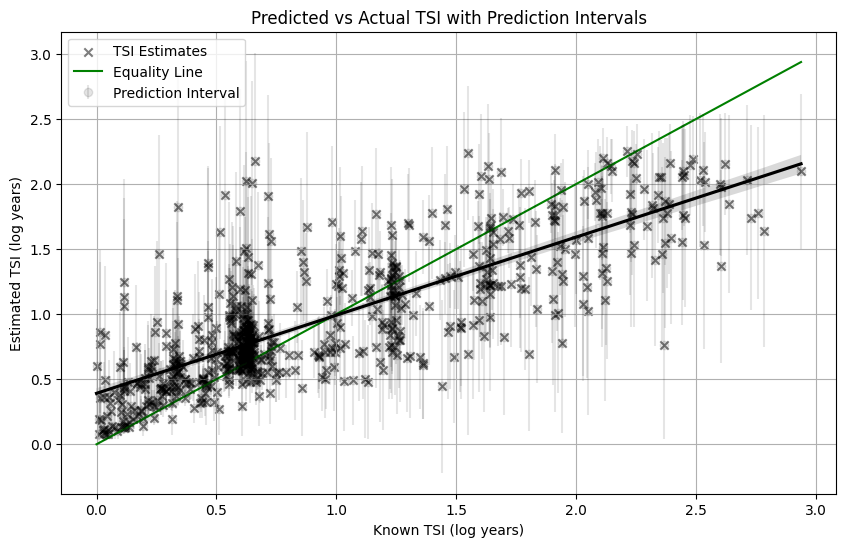

In [45]:
# Plot predicted vs actual values with prediction intervals
plt.figure(figsize=(10, 6))
plt.scatter(true_values, predictions, alpha=0.5, label='TSI Estimates', color='black', marker='x') #predictions vs true values 
plt.plot([true_values.min(), true_values.max()], [true_values.min(), true_values.max()], 'g-', label='Equality Line') #equality line
sns.regplot(x=true_values, y=predictions, scatter=False, ci=95, color='black') #regression line
plt.errorbar(true_values, predictions, yerr=prediction_intervals, fmt='o', alpha=0.1, color='black', label='Prediction Interval')
plt.xlabel('Known TSI (log years)')
plt.ylabel('Estimated TSI (log years)')
plt.title('Predicted vs Actual TSI with Prediction Intervals')
plt.legend()
plt.grid(True) 
plt.savefig('./outputs/predictions/predicted_tsi_years_loocv_f11.png')
plt.show()

# MY FEATURE SET 12 - LOG

## a - hyperparameter tuned

In [42]:
features12= ['genome_lrtt', 'genome_maf12c', 'genome_maf3c', 'genome_tips', 'genome_ambig',
            'gag_lrtt', 'gag_maf12c', 'gag_maf3c', 'gag_tips', 'gag_ambig',
            'pol_lrtt', 'pol_maf12c', 'pol_maf3c', 'pol_tips', 'pol_ambig',
            'gp120_lrtt', 'gp120_maf12c', 'gp120_maf3c', 'gp120_tips', 'gp120_ambig',
            'gp41_lrtt', 'gp41_maf12c', 'gp41_maf3c', 'gp41_tips', 'gp41_ambig',
            'lrtt_coeff_1', 'lrtt_coeff_3', 'lrtt_coeff_11']

# Features and target variable for training and testing sets
X_train = train_features[features12]
y_train = train_features['log_TSI_years']
X_test = test_features[features12]
y_test = test_features['log_TSI_years']

grid_search_f12 = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                                param_grid=param_grid, 
                                cv=3, n_jobs=-1)
grid_search_f12.fit(X_train, y_train)

best_model_f12 = grid_search_f12.best_estimator_

# Make predictions
y_pred_f12 = best_model_f12.predict(X_test)

In [43]:
# Evaluate the model
mse_f12 = mean_squared_error(y_test, y_pred_f12)
mae_f12 = mean_absolute_error(y_test, y_pred_f12)
rmse_f12 = root_mean_squared_error(y_test, y_pred_f12)
r2_f12 = r2_score(y_test, y_pred_f12)
print(f"Best Parameters: {grid_search_f12.best_params_}")
print(f"Mean Squared Error: {mse_f12}")
print(f"Mean Absolute Error: {mae_f12}")
print(f"Root Mean Squared Error: {rmse_f12}")
print(f"R-squared: {r2_f12}")

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error: 0.17574675143875346
Mean Absolute Error: 0.3057264126156811
Root Mean Squared Error: 0.4192216018274267
R-squared: 0.6316421224234956


## b - loocv

In [47]:
# Features and target variable for the combined dataset
X = combined[features12]
y = combined['log_TSI_years']

# Initialize LeaveOneOut cross-validator
loo = LeaveOneOut()

# Arrays to store results
predictions = []
true_values = []
prediction_errors = []

# Perform LOO-CV
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train Random Forest model
    model = RandomForestRegressor(n_estimators= 100, random_state=42,  
                                        bootstrap= True,
                                        max_depth= 10,
                                        max_features= 'sqrt',
                                        min_samples_leaf= 2,
                                        min_samples_split= 2,
                                        )
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Store results
    predictions.append(y_pred[0])
    true_values.append(y_test.values[0])
    prediction_errors.append(np.abs(y_pred[0] - y_test.values[0]))

# Convert results to numpy arrays
predictions = np.array(predictions)
true_values = np.array(true_values)
prediction_errors = np.array(prediction_errors)

# Train a model on the mean absolute errors to generate prediction intervals
error_model = RandomForestRegressor(n_estimators= 100, random_state=42,  
                                        bootstrap= True,
                                        max_depth= 10,
                                        max_features= 'sqrt',
                                        min_samples_leaf= 2,
                                        min_samples_split= 2,
                                        )
error_model.fit(X, prediction_errors)

# Generate prediction intervals for the combined set
prediction_intervals = error_model.predict(X)

# Evaluate the model on the combined set
mse = mean_squared_error(true_values, predictions)
mae = mean_absolute_error(true_values, predictions)
rmse = root_mean_squared_error(true_values, predictions)
r2 = r2_score(true_values, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Aboslute Error: {mae}")
print(f"Root Mean Square Error: {rmse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.1804058580537585
Mean Aboslute Error: 0.3163368606025072
Root Mean Square Error: 0.4247421077003768
R-squared: 0.6228457424822248


## c - plot

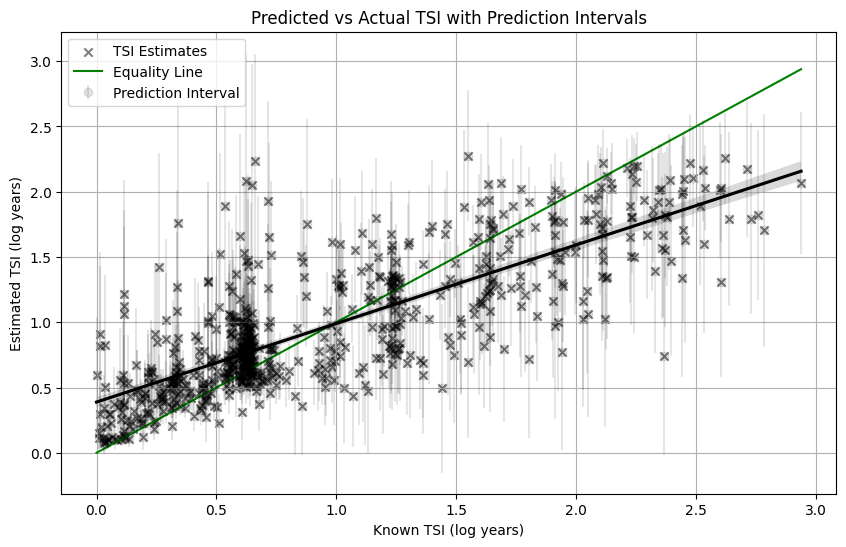

In [49]:
# Plot predicted vs actual values with prediction intervals
plt.figure(figsize=(10, 6))
plt.scatter(true_values, predictions, alpha=0.5, label='TSI Estimates', color='black', marker='x') #predictions vs true values 
plt.plot([true_values.min(), true_values.max()], [true_values.min(), true_values.max()], 'g-', label='Equality Line') #equality line
sns.regplot(x=true_values, y=predictions, scatter=False, ci=95, color='black') #regression line
plt.errorbar(true_values, predictions, yerr=prediction_intervals, fmt='o', alpha=0.1, color='black', label='Prediction Interval')
plt.xlabel('Known TSI (log years)')
plt.ylabel('Estimated TSI (log years)')
plt.title('Predicted vs Actual TSI with Prediction Intervals')
plt.legend()
plt.grid(True) 
#plt.savefig('./outputs/predictions/predicted_tsi_years_loocv_f11.png')
plt.show()

# MY FEATURE SET 13 - LOG

## a - hyperparameter tuned

In [5]:
features13= ['genome_lrtt', 'genome_maf12c', 'genome_maf3c', 'genome_tips', 'genome_ambig',
            'gag_lrtt', 'gag_maf12c', 'gag_maf3c', 'gag_tips', 'gag_ambig',
            'pol_lrtt', 'pol_maf12c', 'pol_maf3c', 'pol_ambig',
            'gp120_lrtt', 'gp120_maf12c', 'gp120_maf3c', 'gp120_tips', 'gp120_ambig',
            'gp41_lrtt', 'gp41_maf12c', 'gp41_maf3c', 'gp41_tips', 'gp41_ambig',
            'lrtt_coeff_1', 'lrtt_coeff_3', 'lrtt_coeff_11']

# Features and target variable for training and testing sets
X_train = train_features[features13]
y_train = train_features['log_TSI_years']
X_test = test_features[features13]
y_test = test_features['log_TSI_years']

In [50]:

grid_search_f13 = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                                param_grid=param_grid, 
                                cv=3, n_jobs=-1)
grid_search_f13.fit(X_train, y_train)

best_model_f13 = grid_search_f13.best_estimator_

# Make predictions
y_pred_f13 = best_model_f13.predict(X_test)

In [52]:
# Evaluate the model
mse_f13 = mean_squared_error(y_test, y_pred_f13)
mae_f13 = mean_absolute_error(y_test, y_pred_f13)
rmse_f13 = root_mean_squared_error(y_test, y_pred_f13)
r2_f13 = r2_score(y_test, y_pred_f13)
print(f"Best Parameters: {grid_search_f13.best_params_}")
print(f"Mean Squared Error: {mse_f13}")
print(f"Mean Absolute Error: {mae_f13}")
print(f"Root Mean Squared Error: {rmse_f13}")
print(f"R-squared: {r2_f13}")

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Mean Squared Error: 0.17668652312857855
Mean Absolute Error: 0.309903815108976
Root Mean Squared Error: 0.4203409605648473
R-squared: 0.6296724000688203


## b - loocv

In [10]:
# Features and target variable for the combined dataset
X = combined[features13]
y = combined['log_TSI_years']

# Initialize LeaveOneOut cross-validator
loo = LeaveOneOut()

# Arrays to store results
predictions = []
true_values = []
prediction_errors = []

# Perform LOO-CV
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train Random Forest model
    model = RandomForestRegressor(n_estimators= 300, random_state=42,  
                                        bootstrap= True,
                                        max_depth= None,
                                        max_features= 'sqrt',
                                        min_samples_leaf= 2,
                                        min_samples_split= 5,
                                        )
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Store results
    predictions.append(y_pred[0])
    true_values.append(y_test.values[0])
    prediction_errors.append(np.abs(y_pred[0] - y_test.values[0]))

# Convert results to numpy arrays
predictions = np.array(predictions)
true_values = np.array(true_values)
prediction_errors = np.array(prediction_errors)

# Train a model on the mean absolute errors to generate prediction intervals
error_model = RandomForestRegressor(n_estimators= 300, random_state=42,  
                                        bootstrap= True,
                                        max_depth= None,
                                        max_features= 'sqrt',
                                        min_samples_leaf= 2,
                                        min_samples_split= 5,
                                        )
error_model.fit(X, prediction_errors)

# Generate prediction intervals for the combined set
prediction_intervals = error_model.predict(X)

# Evaluate the model on the combined set
mse = mean_squared_error(true_values, predictions)
mae = mean_absolute_error(true_values, predictions)
rmse = root_mean_squared_error(true_values, predictions)
r2 = r2_score(true_values, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Aboslute Error: {mae}")
print(f"Root Mean Square Error: {rmse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.17871694507550892
Mean Aboslute Error: 0.31454773176145046
Root Mean Square Error: 0.4227492697515975
R-squared: 0.626376563084148
